https://scikit-learn.org/1.5/modules/neural_networks_supervised.html

In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 41.1 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [4]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/ica_ec_todos2.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/ica_ec_todos0.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/ica_ec_todos1.csv'

Mounted at /content/drive


In [44]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./ECM_103515__blur_02.nii.gz,0.140822,-0.000987,0.426719,0.068939,0.018964,0.001759,0.046415,-0.005728,0.026198,0.069166,...,-0.105684,0.453620,-0.003557,0.082987,0.020071,-0.048319,-0.003180,0.416168,0.027862,2
./ECM_103515__blur_03.nii.gz,0.278933,0.217255,0.307971,0.185545,0.052129,0.026206,0.069909,0.078042,0.190797,0.075453,...,0.017622,0.279863,0.005414,0.064665,0.135144,-0.050480,0.047632,0.449203,0.106094,2
./ECM_103515_blur_01.nii.gz,0.127256,-0.002317,0.535183,0.107888,0.017957,0.004586,0.151495,0.000093,0.026858,0.092743,...,-0.054833,0.223533,-0.000337,0.038854,0.032867,-0.038975,-0.002774,0.484591,0.018729,2
./ECM_104820__blur_02.nii.gz,0.812724,0.185792,0.002224,-0.001977,0.045508,0.069787,0.053346,-0.007132,0.034135,0.001264,...,-0.002448,0.000515,0.412638,0.009528,0.128541,0.003272,0.324139,0.006447,0.033735,2
./ECM_104820__blur_03.nii.gz,0.798680,0.135330,-0.002265,-0.014147,0.027909,0.062077,0.070756,-0.012314,0.029641,0.000057,...,-0.005671,-0.013701,0.417704,0.002908,0.079618,0.004629,0.368052,-0.011044,0.035721,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./ECM_809252__blur_03.nii.gz,0.062349,0.000287,0.186857,0.086312,0.010578,0.000050,0.317779,0.030841,0.024779,0.060563,...,0.086039,0.467880,-0.006199,0.060261,-0.009174,-0.018411,0.001676,0.619468,0.012045,2
./ECM_809252_blur_01.nii.gz,0.148985,0.709672,0.021814,0.110758,0.002557,0.324424,0.024927,0.092546,0.311483,0.000228,...,0.018771,-0.008491,0.135996,-0.002737,0.290642,0.009269,0.142993,0.001615,-0.006165,2
./ECM_822244__blur_02.nii.gz,0.000178,0.003533,0.019305,0.002644,0.014365,0.001709,0.000682,0.003212,0.002033,0.766169,...,0.127348,0.028702,0.003188,0.012401,0.002020,0.000946,0.000157,0.004686,0.000530,2


In [45]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./ECM_114823__blur_02.nii.gz,0.053835,2.608529e-01,0.080252,0.214575,0.103159,0.170983,2.032676e-02,0.446461,0.043075,0.018200,...,-0.045405,0.081135,0.174533,0.038455,0.217799,-0.020633,0.022433,0.002744,0.136336,0
./ECM_114823__blur_03.nii.gz,0.090766,4.036001e-01,0.108691,0.180997,0.029094,0.377034,3.224667e-02,0.400254,0.163347,0.018518,...,0.012107,0.072602,0.130985,0.017414,0.184672,0.005582,0.080291,0.030576,0.055214,0
./ECM_114823_blur_01.nii.gz,-0.016651,6.611214e-02,0.082797,0.093678,0.091449,0.114876,1.471632e-02,0.552489,0.147752,0.067190,...,0.060488,0.082651,0.035018,0.096059,0.035848,-0.012438,0.004899,0.090372,0.156137,0
./ECM_117122__blur_02.nii.gz,0.015026,3.440516e-05,-0.009755,-0.013851,0.193205,0.000072,3.917673e-03,0.047991,0.006509,0.002307,...,-0.034914,0.038196,-0.003640,0.380800,-0.000310,-0.031535,0.005408,-0.004883,0.181918,0
./ECM_117122__blur_03.nii.gz,0.084404,9.250535e-01,0.011177,0.220958,0.003697,0.202278,2.744994e-02,-0.008771,0.268774,0.000428,...,0.023442,-0.005763,0.158931,-0.008586,-0.001005,0.020124,0.063766,-0.022382,0.053599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./ECM_861456__blur_03.nii.gz,0.149565,6.481498e-01,0.015047,0.253091,0.044178,0.250669,5.323398e-02,0.008283,0.121421,-0.003069,...,0.062804,0.011464,0.111192,0.004324,0.000614,0.181859,0.052783,0.005174,0.220179,0
./ECM_861456_blur_01.nii.gz,0.002735,1.001777e-02,0.100628,0.045772,0.029876,0.036776,1.519833e-02,0.061638,0.050345,0.402675,...,0.165815,0.055299,-0.000711,0.026605,0.021304,0.050845,0.002030,0.146964,0.013601,0
./ECM_902242__blur_02.nii.gz,-0.001634,-8.012035e-10,0.005771,-0.003511,0.052667,0.000073,6.061887e-09,0.097639,-0.003713,0.012596,...,-0.037098,0.061835,0.000014,0.319607,0.007680,-0.004858,0.000237,0.005848,0.070336,0


In [46]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./ECM_101915__blur_02.nii.gz,0.027111,0.477486,0.018157,0.314544,0.024174,0.095910,0.022273,0.049905,0.151204,-0.001724,...,0.027140,0.009889,0.286867,0.013123,0.059489,0.175561,0.041865,-0.006473,0.385158,1
./ECM_101915__blur_03.nii.gz,0.071524,0.399077,0.004761,0.349655,0.040432,0.303765,0.016651,0.080492,0.203751,-0.001483,...,-0.001086,0.010314,0.183456,0.001760,0.084736,0.156797,0.103766,0.007347,0.236906,1
./ECM_101915_blur_01.nii.gz,0.052841,0.296271,0.023320,0.037489,0.061791,0.469739,0.020201,0.158701,0.378647,0.069654,...,0.055682,0.014288,0.242759,0.048554,-0.049818,0.002336,0.008928,-0.006757,0.074907,1
./ECM_128632__blur_02.nii.gz,0.031466,0.098914,0.038898,0.643344,0.007199,0.141338,0.012575,0.200690,0.096954,-0.006222,...,-0.054617,-0.000081,0.140519,-0.001004,0.180509,0.265745,0.009779,0.032977,0.042356,1
./ECM_128632__blur_03.nii.gz,0.060329,0.168692,0.058052,0.621145,0.050535,0.057832,0.018021,0.195308,0.089270,0.001859,...,-0.053015,-0.002066,0.159577,0.001025,0.145871,0.278732,0.024309,0.027237,0.081712,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./ECM_987983__blur_03.nii.gz,0.174581,0.583404,0.009060,0.128595,0.056339,0.146301,0.010445,0.048538,0.392810,0.002098,...,0.017276,0.008132,0.040618,-0.002332,0.274697,0.093873,0.176534,-0.006269,0.060441,1
./ECM_987983_blur_01.nii.gz,-0.013204,0.033047,0.075355,0.153255,0.473678,0.017652,0.001092,-0.068068,0.170571,0.018798,...,-0.225868,0.113602,0.009570,0.008461,0.342373,0.057063,0.098165,-0.018163,0.141151,1
./ECM_993675__blur_02.nii.gz,0.014983,0.680588,0.013728,0.066415,-0.043409,0.376042,0.019366,0.187934,0.356649,0.005494,...,0.001712,0.007119,0.101775,-0.005484,0.016270,0.014532,0.043724,-0.021355,-0.011675,1


In [47]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
#data_men['group'] = '0'
#data_pr['group'] = '1'
#data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['label']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['label'] = 'menstrual'
data_pr['label'] = 'proliferativo'
data_lut['label'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['label']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['label']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 66 muestras


In [48]:
print(X_train, y_train)
print(X_test, y_test)

     component_1  component_2  component_3  component_4  component_5  \
0       0.053835     0.260853     0.080252     0.214575     0.103159   
1       0.090766     0.403600     0.108691     0.180997     0.029094   
2      -0.016651     0.066112     0.082797     0.093678     0.091449   
3       0.015026     0.000034    -0.009755    -0.013851     0.193205   
4       0.084404     0.925054     0.011177     0.220958     0.003697   
..           ...          ...          ...          ...          ...   
208     0.112651     0.510947     0.007837     0.210299     0.156850   
209     0.062202     0.352503     0.022825     0.140928     0.341589   
210     0.016638     0.054661     0.050601     0.025747     0.013408   
211     0.137779     0.789173     0.004568     0.268945     0.007261   
212     0.236360     0.048120    -0.032377     0.123013     0.086673   

     component_6  component_7  component_8  component_9  component_10  \
0       0.170983     0.020327     0.446461     0.043075      0

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[-0.15321652  0.0861458  -0.18815445 ... -0.38370115 -0.42125608
   0.22702381]
 [ 0.15811297  0.62935602 -0.04358489 ...  0.02115365 -0.26999004
  -0.33544205]
 [-0.74740894 -0.65492086 -0.17521738 ... -0.50639363  0.05499841
   0.36431088]
 ...
 [-0.46678214 -0.69849778 -0.33888212 ... -0.40828141 -0.44721384
  -0.51278534]
 [ 0.55442815  2.0966175  -0.57289357 ... -0.16716582 -0.64720475
   0.38867023]
 [ 1.38546324 -0.72338633 -0.76070045 ... -0.3249465  -0.1275335
   0.04104987]]


In [50]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0   -0.153217  0.086146 -0.188154  0.520854  0.117229  0.263685 -0.382330   
1    0.158113  0.629356 -0.043585  0.266585 -0.387608  1.529352 -0.310951   
2   -0.747409 -0.654921 -0.175217 -0.394650  0.037410 -0.080955 -0.415927   
3   -0.480371 -0.906373 -0.645700 -1.208921  0.730985 -0.786140 -0.480592   
4    0.104485  2.613696 -0.539293  0.569196 -0.560714  0.455910 -0.339675   
..        ...       ...       ...       ...       ...       ...       ...   
208  0.342605  1.037855 -0.556271  0.488476  0.483187  0.210980 -0.323546   
209 -0.082676  0.434911 -0.480083 -0.036845  1.742386 -0.023528 -0.362564   
210 -0.466782 -0.698498 -0.338882 -0.909061 -0.494525 -0.637768 -0.481151   
211  0.554428  2.096617 -0.572894  0.932579 -0.536426 -0.790631 -0.059895   
212  1.385463 -0.723386 -0.760700 -0.172502  0.004856 -0.795960 -0.280870   

           7         8         9         10        11        12        13  

In [51]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

print(grupo_1_indices)
print(grupo_2_indices)
print(grupo_3_indices)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
[ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137]
[138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212]
Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0  -0.153217  0.086146 -0.188154  0.520854  0.117229  0.263685 -0.382330   
1   0.158113  0.6293

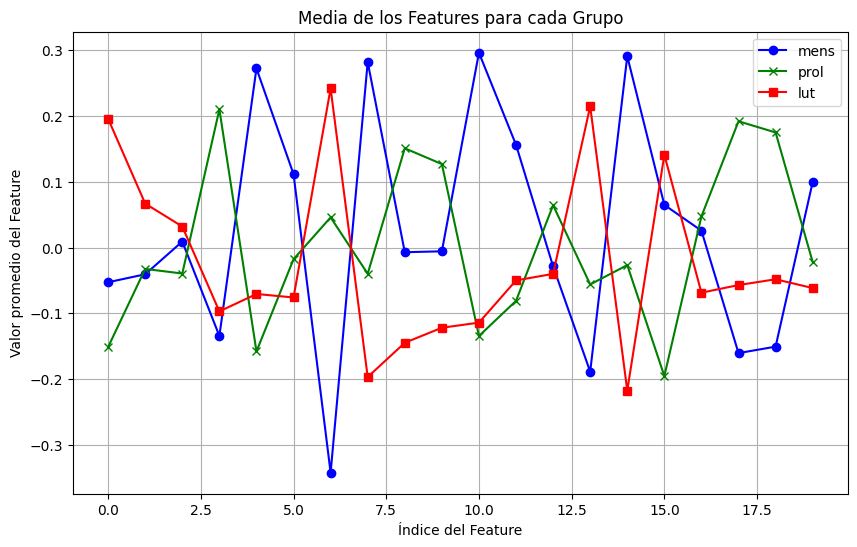

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



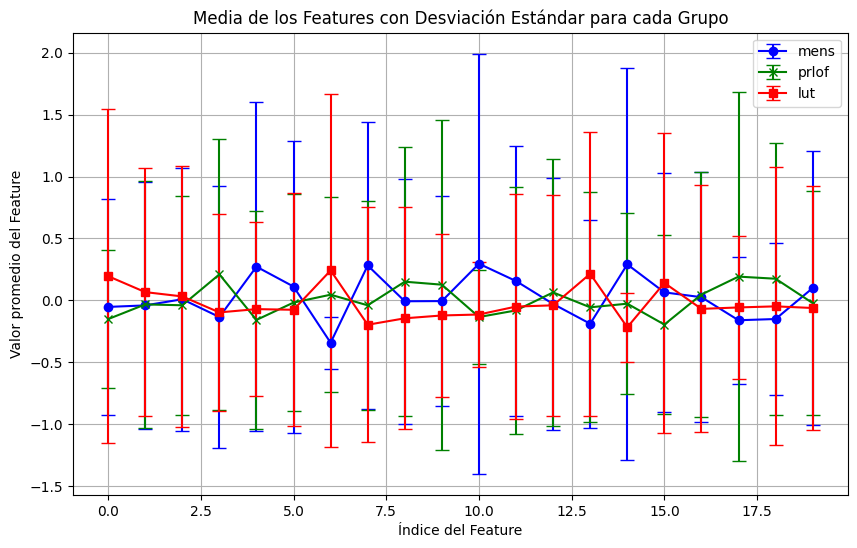

In [53]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


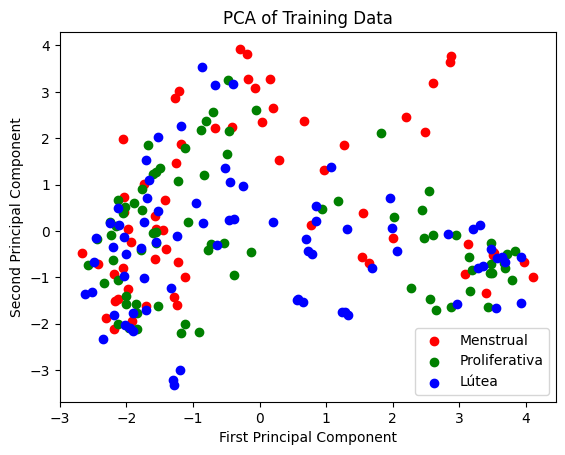

In [54]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [55]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [56]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [57]:
metrics.accuracy_score(y_test, y_predict)

0.3181818181818182

In [58]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3484848484848485


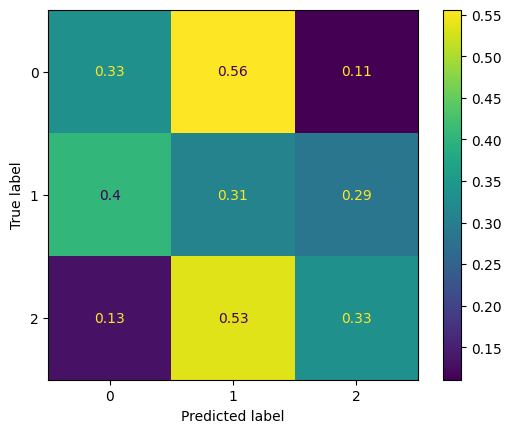

In [59]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

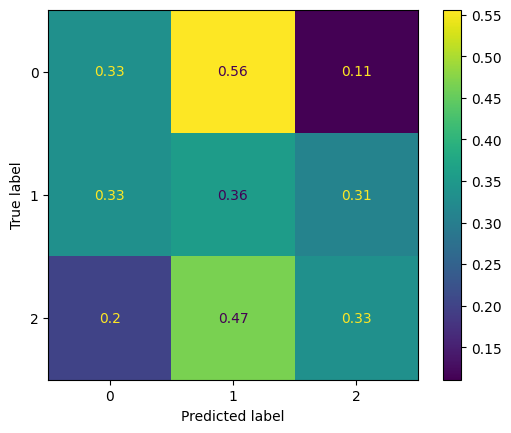

In [60]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [61]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4090909090909091


In [62]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3939393939393939


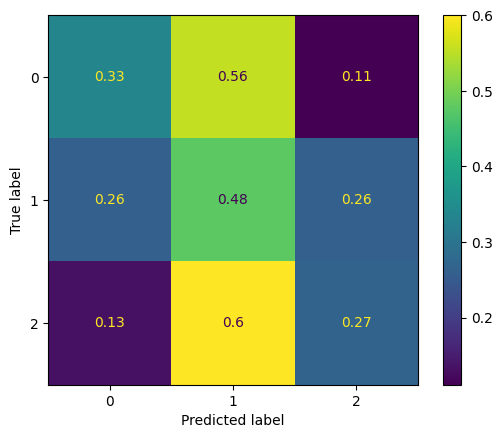

In [63]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

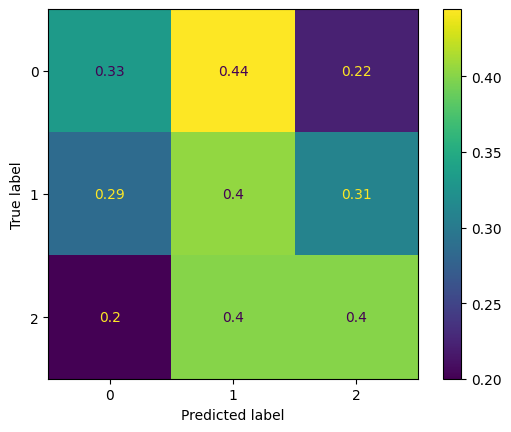

In [64]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

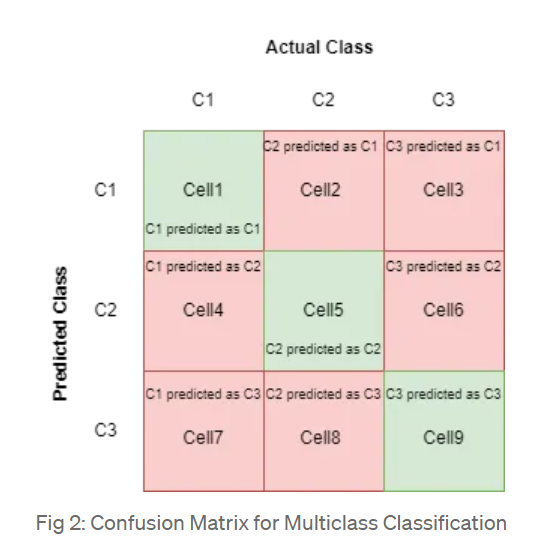

In [65]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [66]:
print(X, y)

     component_1  component_2  component_3  component_4  component_5  \
0       0.053835     0.260853     0.080252     0.214575     0.103159   
1       0.090766     0.403600     0.108691     0.180997     0.029094   
2      -0.016651     0.066112     0.082797     0.093678     0.091449   
3       0.015026     0.000034    -0.009755    -0.013851     0.193205   
4       0.084404     0.925054     0.011177     0.220958     0.003697   
..           ...          ...          ...          ...          ...   
274     0.062349     0.000287     0.186857     0.086312     0.010578   
275     0.148985     0.709672     0.021814     0.110758     0.002557   
276     0.000178     0.003533     0.019305     0.002644     0.014365   
277     0.000881     0.000310     0.018001     0.000870     0.011996   
278     0.039576     0.311358     0.101491     0.311468     0.147719   

     component_6  component_7  component_8  component_9  component_10  \
0       0.170983     0.020327     0.446461     0.043075      0

              precision    recall  f1-score   support

           0       0.36      0.44      0.40         9
           1       0.70      0.71      0.71        42
           2       0.50      0.40      0.44        15

    accuracy                           0.61        66
   macro avg       0.52      0.52      0.52        66
weighted avg       0.61      0.61      0.60        66

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.69      0.86      0.77        42
           2       0.50      0.27      0.35        15

    accuracy                           0.65        66
   macro avg       0.56      0.49      0.50        66
weighted avg       0.62      0.65      0.62        66

              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.67      0.71      0.69        42
           2       0.38      0.33      0.36        15

    accuracy        

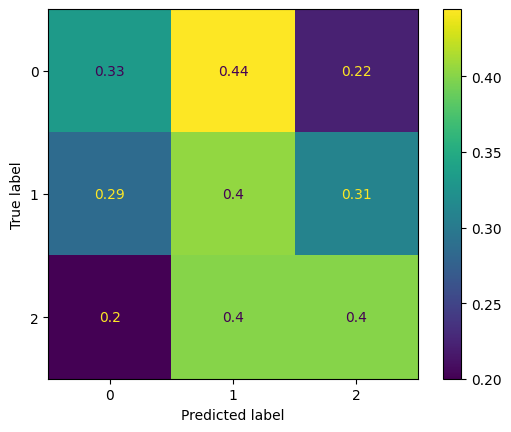

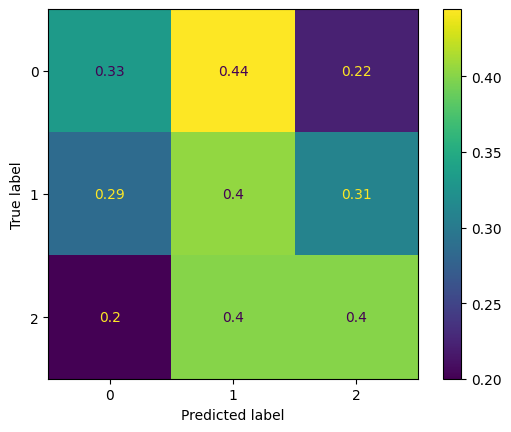

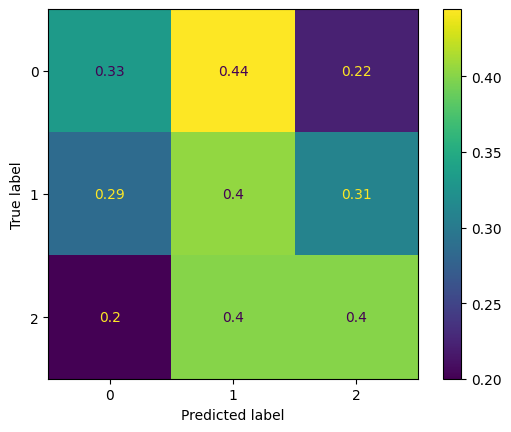

In [67]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


In [68]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.51785714, 0.41071429, 0.51785714, 0.46428571, 0.4       ])

In [69]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.46 accuracy with a standard deviation of 0.05


# Random Forest:

Probaremos ahora con otro modelo

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.30303030303030304
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.56      0.29         9
           1       0.58      0.26      0.36        42
           2       0.19      0.27      0.22        15

    accuracy                           0.30        66
   macro avg       0.32      0.36      0.29        66
weighted avg       0.44      0.30      0.32        66



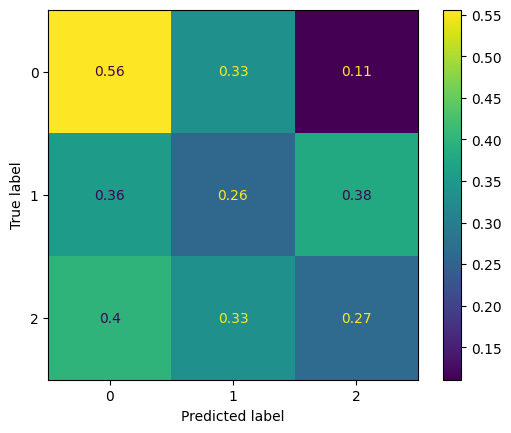

In [72]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [73]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

         Feature  Importance
4    component_5    0.066061
6    component_7    0.064894
8    component_9    0.058617
18  component_19    0.057321
3    component_4    0.056680
14  component_15    0.053040
7    component_8    0.052320
15  component_16    0.051460
5    component_6    0.051039
10  component_11    0.049264


In [74]:
pip install tensorflow

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3770 - loss: 1.1308 - val_accuracy: 0.3571 - val_loss: 1.1171
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4382 - loss: 1.0503 - val_accuracy: 0.4286 - val_loss: 1.0946
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4619 - loss: 1.0153 - val_accuracy: 0.4286 - val_loss: 1.0841
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.9423 - val_accuracy: 0.3750 - val_loss: 1.0795
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5575 - loss: 0.9499 - val_accuracy: 0.3929 - val_loss: 1.0756
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5620 - loss: 0.9174 - val_accuracy: 0.3750 - val_loss: 1.0760
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5942 - loss: 0.8761 - val_accuracy: 0.3929 - val_loss: 1.0798
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5756 - loss: 0.8723 - val_accuracy: 0.3929 - val_loss: 1.0776
Ep

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Matriz de confusión:
[[ 4  7  4]
 [ 3 13  6]
 [ 5  3 11]]


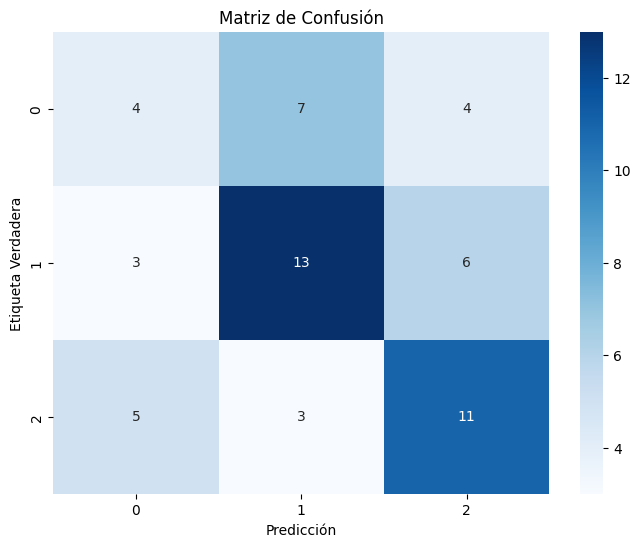

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [77]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

print(y_onehot_test)
print(y_onehot_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1

In [78]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3374 - loss: 1.1491 - val_accuracy: 0.3485 - val_loss: 1.0729
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4490 - loss: 1.0641 - val_accuracy: 0.3485 - val_loss: 1.0793
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5045 - loss: 1.0106 - val_accuracy: 0.4697 - val_loss: 1.0830
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5530 - loss: 0.9815 - val_accuracy: 0.4242 - val_loss: 1.0992
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6408 - loss: 0.9229 - val_accuracy: 0.3939 - val_loss: 1.0972
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6469 - loss: 0.9039 - val_accuracy: 0.3788 - val_loss: 1.1221
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6821 - loss: 0.8890 - val_accuracy: 0.3030 - val_loss: 1.1585
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6402 - loss: 0.8513 - val_accuracy: 0.3485 - val_loss: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Matriz de confusión:
[[ 4  4  1]
 [19 13 10]
 [ 4  6  5]]


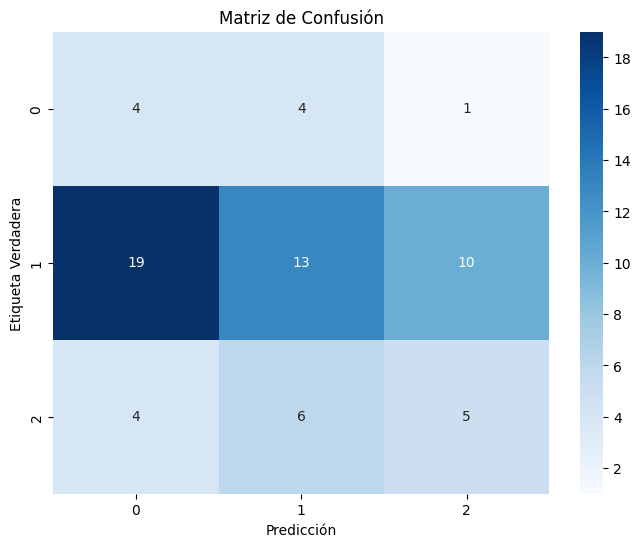

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

